<a href="https://colab.research.google.com/github/p25-c4/car/blob/main/0310_XGB_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 최종모델

In [ ]:
xgb_final = XGBRegressor(max_depth = 3, n_estimators=120, learning_rate=0.04)
xgb_final.fit(df_train_x_rd, df_train_y)

Score on training set: 0.886
Score on test set: 0.841



*   n_estimators(트리 수) 120,  
최대 깊이(max_depth) 3,  
학습률(learning_rate) 0.04 일 때,  
 **설명력이 84.1%**



### predict & evaluation

In [ ]:

# 예측
y_pred = xgb_final.predict(df_test_x_rd)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(xgb_final.score(df_train_x_rd, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(xgb_final.score(df_test_x_rd, df_test_y)))

### feature importance

In [ ]:
# 변수명
v_feature_name = df_train_x_rd.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = xgb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
3,Power,0.346
23,Transmission_Automatic,0.102
6,Age,0.093
22,Fuel_Type_Petrol,0.077
2,Engine,0.064
0,Kilometers_Driven,0.042
44,Brand_Mercedes-Benz,0.041
41,Brand_Land,0.039
26,Brand_Audi,0.027
19,Fuel_Type_Diesel,0.018


Text(0, 0.5, '설명변수')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 46020 (\N{HANGUL SYLLABLE 

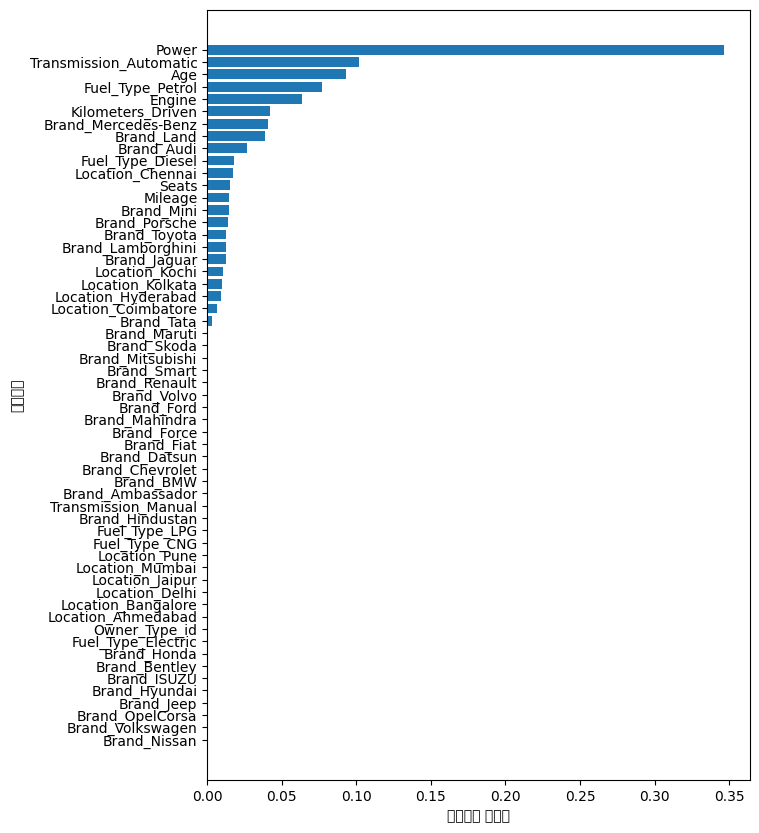

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
fig, ax = plt.subplots(figsize=(7, 10))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

* 설명변수 중요도  
Power > Transmission_Automatic > Age > Fuel_Type_Petrol > Engine > Kilometers_Driven  
 순으로 영향력이 크다

### grid search

In [ ]:

estimator = XGBRegressor()
param_grid = {"learning_rate": para_lr, "max_depth": para_depth,
              'gamma' : [0,1,2,3]}

grid_xgb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_xgb.fit(df_train_x_rd, df_train_y)

print("best estimator model: \n{}".format(grid_xgb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_xgb.best_params_))
print("\nbest score: \n{}".format(grid_xgb.best_score_.round(3)))

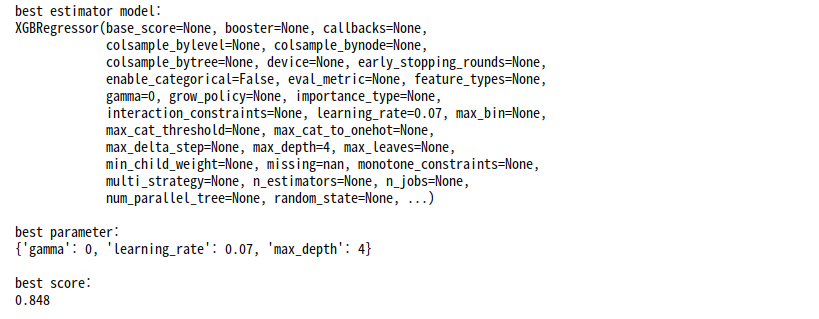

grid search로 탐색한 최적 모델의 파라미터  
learning_rate = 0.07, max_depth = 4  
설명력은 84.8%로 직접 찾은 모델보다 약간 높다.  
최종 모델 결정을 위해 test score를 구해보기로 한다.

In [ ]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(grid_xgb.score(df_train_x_rd, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(grid_xgb.score(df_test_x_rd, df_test_y)))

Score on training set: 0.939  
Score on test set: 0.850
